In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
mean0=np.array([1,2])
cov0=np.array([[1,0.1],[0.1,2]])

mean1=np.array([6,7])
cov1=np.array([[1.21,0.1],[0.1,1.1]])

dist0=np.random.multivariate_normal(mean0,cov0,500)
dist1=np.random.multivariate_normal(mean1,cov1,500)

print(dist0.shape)
print(dist1.shape)

(500, 2)
(500, 2)


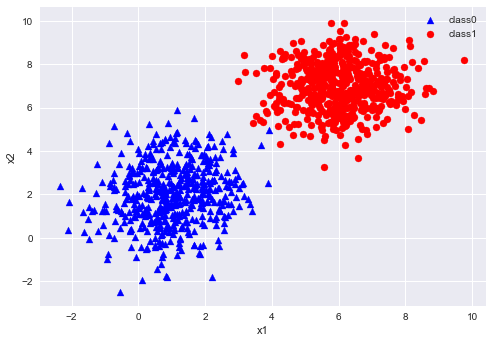

In [4]:
plt.figure()
plt.scatter(dist0[:,0],dist0[:,1],color='blue',label='class0' ,marker='^')
plt.scatter(dist1[:,0],dist1[:,1],color='red',label='class1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [12]:
data=np.zeros((1000,3))
data[:500,:2]=dist0
data[500:,:2]=dist1
data[500:,-1]=1.0
np.random.shuffle(data)

split=int(0.8*data.shape[0])

In [13]:
X_train , Y_train=data[:split,:2],data[:split,-1]
X_test , Y_test=data[split:,:2],data[split:,-1]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


In [14]:
def hypothesis(x,w,b):
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m  

def get_grads(y_true,x,w,b):
    m=x.shape[0]
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    grad_w/=m
    grad_b/=m
    return [grad_w,grad_b]

def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b
def predict(x,w,b):
    hx=hypothesis(x,w,b)
    if hx<0.5:
        return 0
    else:
        return 1
    
def getAccuracy(x,y,w,b):
    m=x.shape[0]
    y_a=[]
    for i in range(m):
        p=predict(x[i],w,b)
        y_a.append(p)
    return  ((y_a==y).sum()) /y.shape[0]

In [15]:
loss=[]
accuracy=[]
w=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()
print(X_train[0].shape)

(2,)


In [16]:

for i in range(1000):
    l,w,b=grad_descent(X_train,Y_train,w,b,learning_rate=0.1)
    a=getAccuracy(X_test,Y_test,w,b)
    accuracy.append(a)
    loss.append(l)

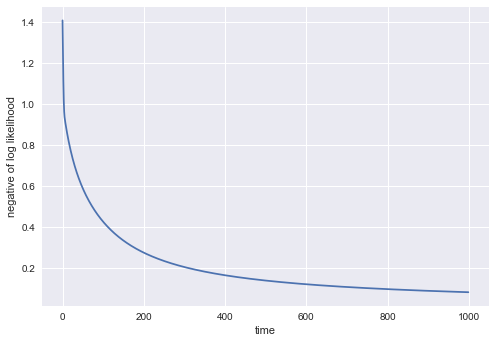

In [17]:
plt.plot(loss)
plt.xlabel('time')
plt.ylabel('negative of log likelihood')
plt.show()

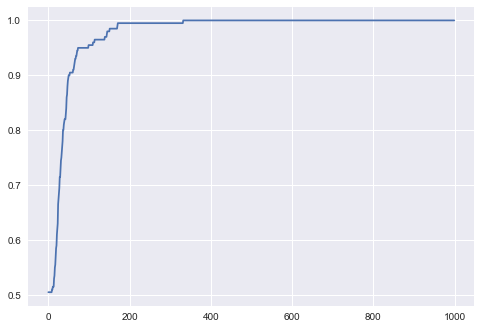

1.0


In [18]:
plt.plot(accuracy)
plt.show()
print(accuracy[-1])

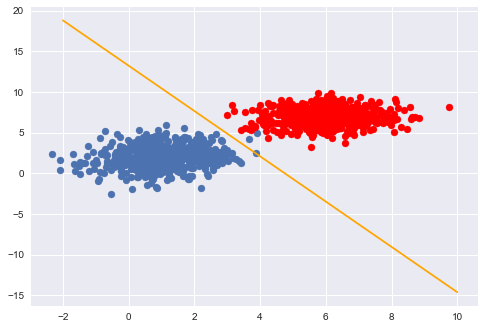

In [27]:
plt.scatter(dist0[:,0],dist0[:,1],label="class0")
plt.scatter(dist1[:,0],dist1[:,1],color='red',label='class1')
x=np.linspace(-2,10,num=20)
y=-(x*w[0]+b)/w[1]
plt.plot(x,y,color='orange')
plt.show()

In [28]:
print(w)
print(b)

[1.09525349 0.39339671]
-5.200341259999239
